In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

# for visualization
import torchvision
import torchvision.transforms.v2 as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

now, in PyTorch, we use our GPU in our operations by setting the device to cuda.
the next function will confirm pyTorch can recognize the GPU

In [2]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

False

Cuda is not available , so may install it but not neccessary to install it

In the history of deep learning, the accurate image classification of the MNIST dataset, a collection of 70,000 grayscale images of handwritten digits from 0 to 9, was a major development.

In [3]:
train_set=torchvision.datasets.MNIST("./data/",train=True, download=True)
valid_set=torchvision.datasets.MNIST("./data/",train=False, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 59.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.65MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.53MB/s]


After that we can see that TorchVision has seperated data into train and valid sets. Out of 70,000 grayscale images 60,000 are for train and 10,000 for test

In [4]:
train_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train

In [5]:
valid_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test

Let's take the first x, y pair from train_set and review the data structures:

In [6]:
x_0,y_0=train_set[0]

In [7]:
x_0

In [8]:
y_0

5

In [9]:
type(y_0)

int

In [10]:
type(x_0)

PIL.Image.Image

a tensor is an n-dimensional array representing any number of dimensions.

One example of a 3-dimensional tensor could be pixels on a computer screen. The different dimensions would be width, height, and color channel. Video games use matrix mathematics to calculate pixel values in a similar way to how neural networks calculate tensors.

Let's convert our images into tensors so we can later process them with a neural network.

In [11]:
trans=transforms.Compose([transforms.ToTensor()])
x_0_tensor=trans(x_0)

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [12]:
x_0_tensor.dtype

torch.float32

We can verify the minimum and maximum values. PIL Images have a potential integer range of [0, 255], but the ToTensor class converts it to a float range of [0.0, 1.0].

In [13]:
x_0_tensor.min()

tensor(0.)

In [14]:
x_0_tensor.max()

tensor(1.)

we can see the size of each dimension. PyTorch uses a C x H x W, means color channel, height, width

As the images are black and white the channel will be 1

In [15]:
x_0_tensor.size()

torch.Size([1, 28, 28])

In [16]:
x_0_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

by default , a tensor is processed with a CPU

In [17]:
# to move it to GPU USE
x_0_tensor.device

device(type='cpu')

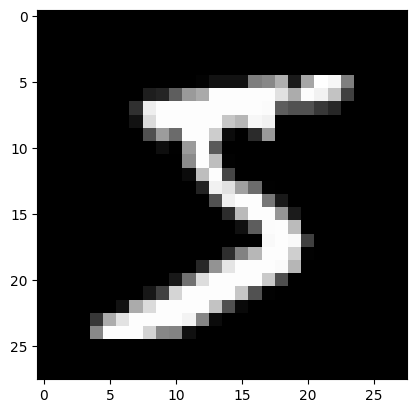

In [18]:
image=F.to_pil_image(x_0_tensor)   # we can convert tensor to PIL image using this function
plt.imshow(image,cmap='gray')

In [19]:
trans=transforms.Compose([transforms.ToTensor()])

In [21]:
# other way to do that
train_set.transform=trans
valid_set.transform=trans

Now , we will load the data , we use the term DataLoader , it refers to as we create a batch _size , batch_size refers to as For example, if our `batch_size` is 32, we will train our model by shuffling the deck and drawing 32 cards. We do not need to shuffle for validation as the model is not learning, but we will still use a `batch_size` to prevent memory errors.


In [24]:
batch_size=32

train_loader=DataLoader(train_set,batch_size=batch_size, shuffle=True)
valid_loader=DataLoader(valid_set,batch_size=batch_size)


NOW, WE WILL BE CREATING A MODEL
NEURAL NETWORKS ARE COMPOSED OF LAYERS WHERE EACH LAYER PERFORMS A MATHEMATICAL OPERATION ON THE DATA

TO START, THERE ARE 4 LAYERS

1. A Flatten used to convert n-dimensional data into a vector.
2. An input layer, the first layer of neurons
3. A hidden layer, another layor of neurons "hidden" between the input and output
4. An output layer, the last set of neurons which returns the final prediction from the model


In [25]:
layers=[]

In [26]:
# flattening the image , coverting 3 dimension to 1 dimension

test_matrix=torch.tensor(
    [[1,2,3],
     [4,5,6],
     [7,8,9]]
)
test_matrix

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [27]:
nn.Flatten()(test_matrix)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Nothing happened?
That's because neural networks expect to recieve a batch of data. Currently, the Flatten layer sees three vectors as opposed to one 2d matrix. To fix this, we can "batch" our data by adding an extra pair of brackets. Since test_matrix is now a tensor, we can do that with the shorthand below. None adds a new dimension where : selects all the data in a tensor.

In [28]:
batch_test_matrix=test_matrix[None,:]
batch_test_matrix

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [29]:
nn.Flatten()(batch_test_matrix)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [30]:
nn.Flatten()(test_matrix[None,:])

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [32]:
layers=[nn.Flatten()]
layers

[Flatten(start_dim=1, end_dim=-1)]

In [33]:
# now, the input layer
input_size=1 * 28 * 28

 we will use the relu activation function, which in short, will help our network to learn how to make more sophisticated guesses about data than if it were required to make guesses based on some strictly linear function.

In [34]:
layers=[nn.Flatten(),
        nn.Linear(input_size,512),
        nn.ReLU()]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU()]

Now, we will add the hidden layer

In [35]:
layers=[nn.Flatten(),
        nn.Linear(input_size,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU()]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU()]

NOW THE OUTPUT LAYER

In [37]:
n_classes=10  # no. of possible answers out of which it can answer it in this case its from 0 to 9 means 10
layers=[nn.Flatten(),
        nn.Linear(input_size,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,n_classes)]

layers


[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=10, bias=True)]

In [39]:
#compiling the model
model=nn.Sequential(*layers)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

In [40]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

In [41]:
model=torch.compile(model)  # for faster performance

NOW WE TRAIN THE MODEL:-
Now that we have prepared training and validation data, and a model, it's time to train our model with our training data, and verify it with its validation data.

Just like how teachers grade students, we need to provide the model a function in which to grade its answers. This is called a loss function. We will use a type of loss function called CrossEntropy which is designed to grade if a model predicted the correct category from a group of categories.

In [42]:
loss_function=nn.CrossEntropyLoss()

In [43]:
optimizer=Adam(model.parameters())  # optimizer tells the model how to learn from this grade to do better next time.

In [44]:
train_N=len(train_loader.dataset)
valid_N=len(valid_loader.dataset)
# total no. of predictions is the same size as our dataset.

now we will calculate the accuracy for each batch

In [48]:
def get_batch_accuracy(output,y,N):
  pred= output.argmax(dim=1, keepdim=True)
  correct = pred.eq(y.view_as(pred)).sum().item()

  return correct/N

now training our model and using all the above given info

In [55]:
def train():
  loss=0
  accuracy=0

  model.train()
  for x,y in train_loader:
    x,y = x.to(device), y.to(device)
    output=model(x)
    optimizer.zero_grad()
    batch_loss=loss_function(output,y)
    batch_loss.backward()
    optimizer.step()

    loss+=batch_loss.item()
    accuracy+=get_batch_accuracy(output,y,train_N)
    print('train-loss:{:.4f} Accuracy:{:.4f}'.format(loss, accuracy))






In [56]:
# NOW FOR VALIDATE FUNCTION
def validate():
    loss = 0
    accuracy = 0

    model.eval()
    with torch.no_grad():
        for x, y in valid_loader:
            x, y = x.to(device), y.to(device)
            output = model(x)

            loss += loss_function(output, y).item()
            accuracy += get_batch_accuracy(output, y, valid_N)
    print('Valid - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

An epoch is one complete pass through the entire dataset. Let's train and validate the model for 5 epochs to see how it learns.

In [57]:
epochs=5

for epoch in range(epochs):
  print('Epoch:{}'.format(epoch))
  train()
  validate()

Streaming output truncated to the last 5000 lines.
train-loss:37.4719 Accuracy:0.3303
train-loss:37.4784 Accuracy:0.3309
train-loss:37.5442 Accuracy:0.3314
train-loss:37.5878 Accuracy:0.3319
train-loss:37.6144 Accuracy:0.3324
train-loss:37.6167 Accuracy:0.3330
train-loss:37.7540 Accuracy:0.3335
train-loss:37.7592 Accuracy:0.3340
train-loss:37.7724 Accuracy:0.3345
train-loss:37.9123 Accuracy:0.3350
train-loss:37.9622 Accuracy:0.3355
train-loss:37.9837 Accuracy:0.3361
train-loss:37.9889 Accuracy:0.3366
train-loss:38.0783 Accuracy:0.3371
train-loss:38.0974 Accuracy:0.3377
train-loss:38.1541 Accuracy:0.3382
train-loss:38.1594 Accuracy:0.3387
train-loss:38.1655 Accuracy:0.3392
train-loss:38.1681 Accuracy:0.3398
train-loss:38.2284 Accuracy:0.3403
train-loss:38.2591 Accuracy:0.3408
train-loss:38.2696 Accuracy:0.3414
train-loss:38.2974 Accuracy:0.3419
train-loss:38.3194 Accuracy:0.3424
train-loss:38.4197 Accuracy:0.3429
train-loss:38.4964 Accuracy:0.3435
train-loss:38.5033 Accuracy:0.3440
trai

In [61]:
x_0_tensor = x_0_tensor.to(device)
prediction = model(x_0_tensor)




In [1]:
prediction.argmax(dim=1, keepdim=True)

NameError: name 'prediction' is not defined

In [63]:
y_0

5

In [65]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}